In [ ]:
#1 Download the tripadvisor_hotel_reviews.csv
# %pip install numpy==1.26.4
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(data.head())

                                              Review  Rating
0  a nice hotel expensive parking got good deal s...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [28]:
#2 Basic EDA: Check for missing values; address any missing data accordingly
print(data.isnull().sum())

# Remove missing values
data.dropna(inplace=True)

# use only first 10000 rows
data = data.head(10000)


Review    0
Rating    0
dtype: int64


In [29]:
#3 Break-down sentences into words for word-level analysis
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the necessary resources
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Create a function to tokenize the words, removing the stop words, punctuation, and lemmatizing the words

stop_words = set(stopwords.words('english'))

def tokenize_words(text):
    # Tokenize the words
    words = word_tokenize(text)

    # Remove the stop words
    words = [word for word in words if word.lower() not in stop_words]

    # Remove the punctuation
    words = [word for word in words if word not in string.punctuation]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

def tokenize_sentences(text):
    # Tokenize the sentences
    sentences = sent_tokenize(text)

    return sentences

#apply the function to the data
data['Review Cleaned'] = data['Review'].apply(lambda x: tokenize_words(x))
data['Sentences'] = data['Review'].apply(lambda x: tokenize_sentences(x))
data.head()



,Review,Rating,Review Cleaned,Sentences
0,a nice hotel expensive parking got good deal s...,4,"[nice, hotel, expensive, parking, got, good, d...",[a nice hotel expensive parking got good deal ...
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",[ok nothing special charge diamond member hilt...
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great stay great stay, went seahawk game awes..."


In [30]:
#3b Make the same with spacy for the performance comparison
import spacy
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

def tokenize_with_spacy(text):
    # Process the text
    doc = nlp(text)

    # Get tokens that:
    # - are not stop words
    # - are not punctuation
    # - are not whitespace
    words = [token.lemma_ for token in doc
             if not token.is_stop
             and not token.is_punct
             and not token.is_space]

    sentences = [sent.text for sent in doc.sents]

    return [words, sentences]

# Apply the function to the data
data['Review Cleaned w/spacy'], data['Sentences w/spacy'] = zip(*data['Review'].apply(tokenize_with_spacy))
data.head()

,Review,Rating,Review Cleaned,Sentences,Review Cleaned w/spacy,Sentences w/spacy
0,a nice hotel expensive parking got good deal s...,4,"[nice, hotel, expensive, parking, got, good, d...",[a nice hotel expensive parking got good deal ...,"[nice, hotel, expensive, parking, get, good, d...",[a nice hotel expensive parking got good deal ...
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",[ok nothing special charge diamond member hilt...,"[ok, special, charge, diamond, member, hilton,...",[ok nothing special charge diamond member hilt...
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great stay great stay, went seahawk game awes...","[great, stay, great, stay, go, seahawk, game, ...","[great stay great stay, went seahawk game awes..."


In [31]:
# Review Length
data['Original Review Length'] = data['Review'].apply(lambda x: len(x))
data['Words Count'] = data['Review Cleaned'].apply(lambda x: len(x))
data['Words Count (spacy)'] = data['Review Cleaned w/spacy'].apply(lambda x: len(x))
data['Sentences Count'] = data['Sentences'].apply(lambda x: len(x))
data['Sentences Count (spacy)'] = data['Sentences w/spacy'].apply(lambda x: len(x))
data.head()

,Review,Rating,Review Cleaned,Sentences,Review Cleaned w/spacy,Sentences w/spacy,Original Review Length,Words Count,Words Count (spacy),Sentences Count,Sentences Count (spacy)
0,a nice hotel expensive parking got good deal s...,4,"[nice, hotel, expensive, parking, got, good, d...",[a nice hotel expensive parking got good deal ...,"[nice, hotel, expensive, parking, get, good, d...",[a nice hotel expensive parking got good deal ...,595,81,83,1,1
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",[ok nothing special charge diamond member hilt...,"[ok, special, charge, diamond, member, hilton,...",[ok nothing special charge diamond member hilt...,1689,237,235,1,3
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...,1427,211,206,2,4
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona...",600,86,85,1,1
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great stay great stay, went seahawk game awes...","[great, stay, great, stay, go, seahawk, game, ...","[great stay great stay, went seahawk game awes...",1281,180,174,1,1


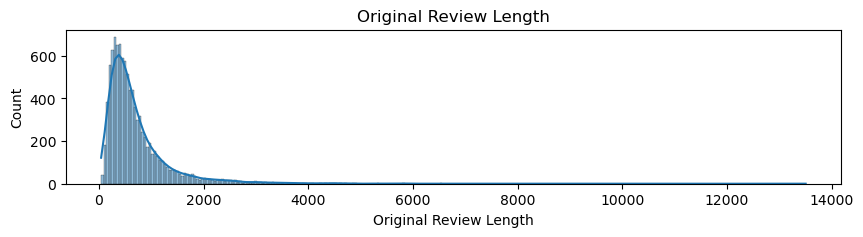

In [32]:
# Visualize review length, word counts and sentences length using bar plots and kdeplots
import matplotlib.pyplot as plt
import seaborn as sns

# Original Review Length  chart
plt.figure(figsize=(10, 2))
sns.histplot(data['Original Review Length'], kde=True)
plt.title('Original Review Length')
plt.show()

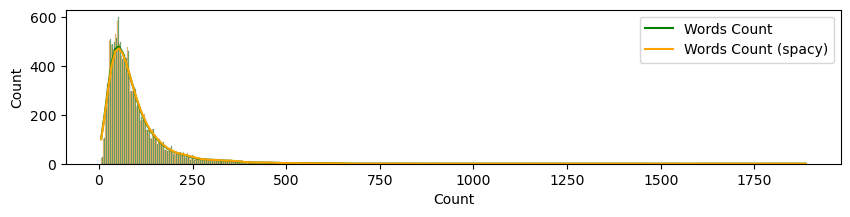

In [33]:
# Words Count chart
plt.figure(figsize=(10, 2))

# Melt the data for seaborn
combined_words_data = pd.DataFrame({
    'Words Count': data['Words Count'],
    'Words Count (spacy)': data['Words Count (spacy)']
})
melted_data = combined_words_data.melt(var_name='Type', value_name='Count')

sns.histplot(data=melted_data, x='Count', hue='Type', multiple='dodge', kde=True, palette=['orange', 'green'], alpha=0.5)

plt.legend(['Words Count', 'Words Count (spacy)'])
plt.show()


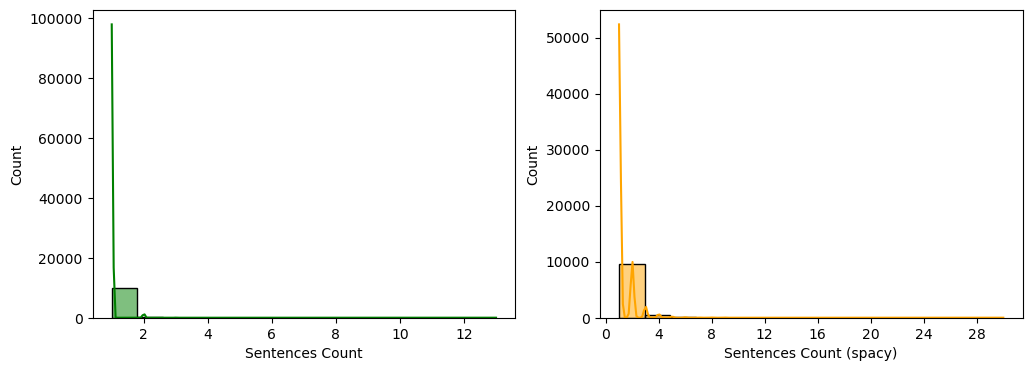

In [34]:
# Sentence Count charts

#show two charts side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Original Sentence Count chart
sns.histplot(data['Sentences Count'], kde=True, ax=axs[0], color='green')
axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #integer values on x-axis

# Sentence Count chart
sns.histplot(data['Sentences Count (spacy)'], kde=True, ax=axs[1], color='orange')
axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #integer values on x-axis

plt.show()


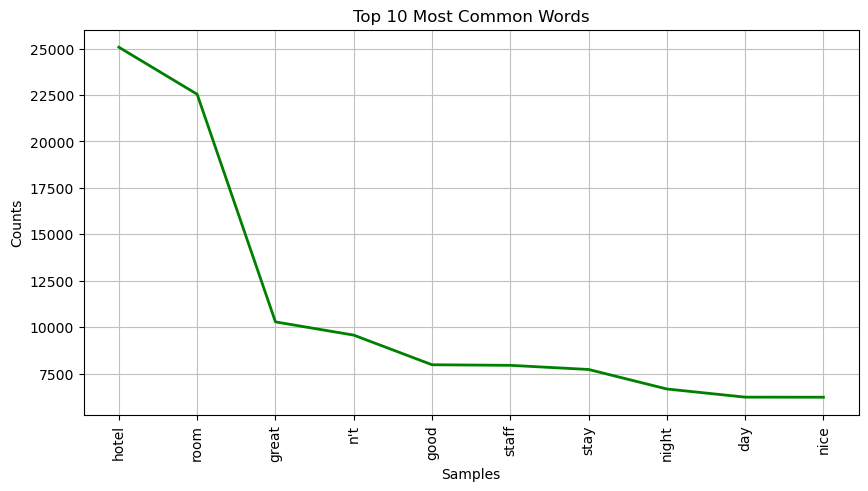

In [35]:
# Plot the top 10 most common words in the reviews using nltk.FreqDist

from nltk import FreqDist

all_words = [word for review in data['Review Cleaned'] for word in review]

# Create a frequency distribution
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)

# Plot the top 10 most common words as a bar chart
plt.figure(figsize=(10, 5))
freq_dist.plot(10, title='Top 10 Most Common Words', cumulative=False, color='green')
plt.show()


[('hotel', 25073), ('room', 22541), ('great', 10288), ("n't", 9576), ('good', 7981), ('staff', 7949), ('stay', 7727), ('night', 6676), ('day', 6237), ('nice', 6233)]


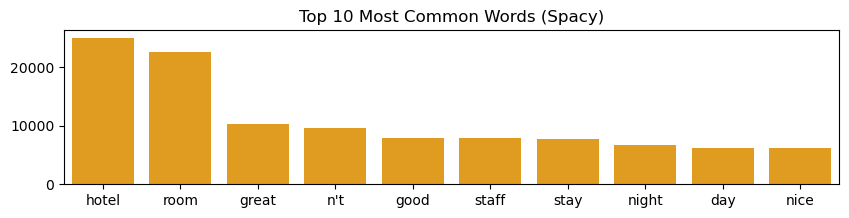

In [36]:
# Create a frequency distribution for the words from the Spacy tokenization

from collections import Counter

# Create a Counter object
all_words_spacy = [word for review in data['Review Cleaned w/spacy'] for word in review]
word_counter_spacy = Counter(all_words)
print(word_counter_spacy.most_common(10))

# Plot the top 10 most common words from word_counter_spacy as a bar chart
plt.figure(figsize=(10, 2))
sns.barplot(x=[word[0] for word in word_counter_spacy.most_common(10)],
            y=[word[1] for word in word_counter_spacy.most_common(10)], color='orange')
plt.title('Top 10 Most Common Words (Spacy)')
plt.show()


In [37]:
#4 Work with n-grams

from nltk import ngrams

# Create a function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(grams) for grams in n_grams]

# Apply the function to the data
data['Bigrams'] = data['Review Cleaned'].apply(lambda x: generate_ngrams(x, 2))
data['Trigrams'] = data['Review Cleaned'].apply(lambda x: generate_ngrams(x, 3))
data.head()

,Review,Rating,Review Cleaned,Sentences,Review Cleaned w/spacy,Sentences w/spacy,Original Review Length,Words Count,Words Count (spacy),Sentences Count,Sentences Count (spacy),Bigrams,Trigrams
0,a nice hotel expensive parking got good deal s...,4,"[nice, hotel, expensive, parking, got, good, d...",[a nice hotel expensive parking got good deal ...,"[nice, hotel, expensive, parking, get, good, d...",[a nice hotel expensive parking got good deal ...,595,81,83,1,1,"[nice hotel, hotel expensive, expensive parkin...","[nice hotel expensive, hotel expensive parking..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",[ok nothing special charge diamond member hilt...,"[ok, special, charge, diamond, member, hilton,...",[ok nothing special charge diamond member hilt...,1689,237,235,1,3,"[ok nothing, nothing special, special charge, ...","[ok nothing special, nothing special charge, s..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...,"[nice, room, 4, experience, hotel, monaco, sea...",[nice rooms not 4* experience hotel monaco sea...,1427,211,206,2,4,"[nice room, room 4, 4 experience, experience h...","[nice room 4, room 4 experience, 4 experience ..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great stay, wonderful time hotel mona...",600,86,85,1,1,"[unique great, great stay, stay wonderful, won...","[unique great stay, great stay wonderful, stay..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great stay great stay, went seahawk game awes...","[great, stay, great, stay, go, seahawk, game, ...","[great stay great stay, went seahawk game awes...",1281,180,174,1,1,"[great stay, stay great, great stay, stay went...","[great stay great, stay great stay, great stay..."


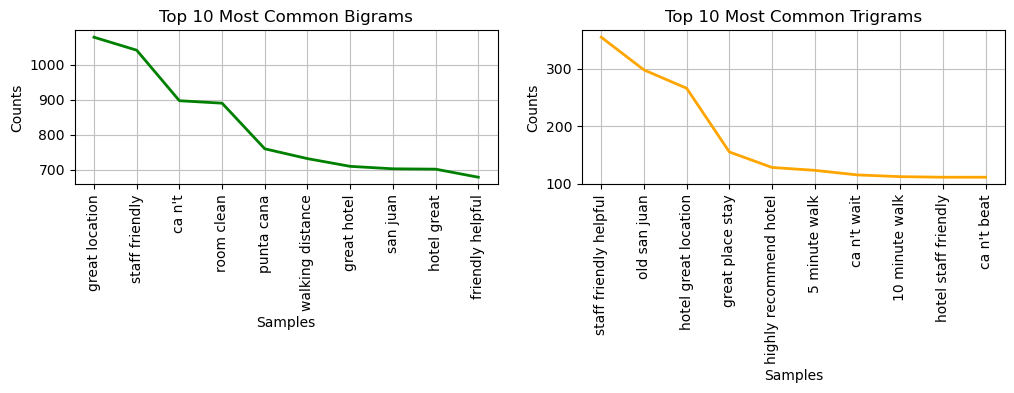

In [38]:
# Visualize the top 10 most common bigrams and trigrams using nltk.FreqDist

all_bigrams = [bigram for review in data['Bigrams'] for bigram in review]
all_trigrams = [trigram for review in data['Trigrams'] for trigram in review]

bigrams_freq_dist = FreqDist(all_bigrams)
trigrams_freq_dist = FreqDist(all_trigrams)

# Plot the top 10 most common bigrams and trigrams side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 2))

# Top 10 most common bigrams
plt.sca(axs[0])
bigrams_freq_dist.plot(10, title='Top 10 Most Common Bigrams', cumulative=False, color='green')

# Top 10 most common trigrams
plt.sca(axs[1])
trigrams_freq_dist.plot(10, title='Top 10 Most Common Trigrams', cumulative=False, color='orange')


plt.show()